In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [39]:
def walk1D(n, x_init):
    x = np.zeros(n)
    x[0] = x_init
    for i in range(1, n):
        x[i] = x[i-1] + np.random.choice(np.array([1,-1]))
    return x

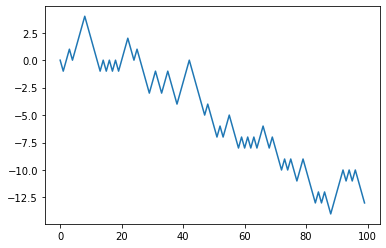

In [44]:
x = walk1D(100, 0)
plt.plot(x);

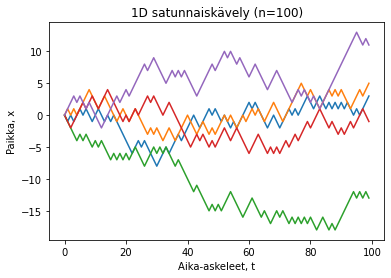

In [144]:
n = 100
m = 5
x_init = 0
for i in range(m):
    x = walk1D(n, x_init)
    plt.plot(x)
plt.xlabel('Aika-askeleet, t')
plt.ylabel('Paikka, x')
plt.title('1D satunnaiskävely (n=100)')
plt.savefig('walk1D100.jpg')
plt.show()

In [81]:
x_final_distance = abs(X[...,n-1])
x_final_distance.mean(), x_final_distance.std()

(25.0, 20.874865269026287)

In [82]:
n**(0.5)

31.622776601683793

In [84]:
def m_walks1D(m, n, x_init):
    X = np.zeros(m*n).reshape(m, n)
    for i in range(m):
        x = walk1D(n, x_init)
        X[i] = x
    return X

In [155]:
m = 1000
x_init = 0
n_values = [10, 20, 40, 60, 80, 100, 200, 400, 600, 800, 1000, 2000, 4000, 6000]
final_distance_means = np.zeros(len(n_values))
for i, n in enumerate(n_values):
    X = m_walks1D(m, n, x_init)
    final_distance_means[i] = abs(X[..., n-1]).mean()

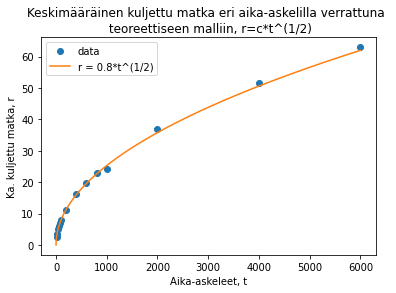

In [190]:
plt.plot(n_values, final_distance_means, 'o', label='data')
t_test = np.arange(0, 6000, 0.1)
r_test = 0.8*t_test**(0.5)  # r_mean = c*t^(1/2) where coefficent c is to be determined...
plt.plot(t_test, r_test, label='r = 0.8*t^(1/2)');
plt.xlabel('Aika-askeleet, t')
plt.ylabel('Ka. kuljettu matka, r')
plt.savefig('walk1D_analysis.jpg')
plt.title('Keskimääräinen kuljettu matka eri aika-askelilla verrattuna \n teoreettiseen malliin, r=c*t^(1/2)')
plt.legend()
plt.show()

In [160]:
def walk2D(n, x1_init, x2_init):
    x = np.zeros(2*n).reshape(2,n)
    x[0,0] = x1_init
    x[1,0] = x2_init
    a = np.array([-1,1])
    for i in range(1,n):
        dim_var = np.random.randint(2)
        if dim_var == 0:
            x[0, i] = x[0, i-1] + np.random.choice(a)
            x[1, i] = x[1, i-1]
        else:
            x[1, i] = x[1, i-1] + np.random.choice(a)
            x[0, i] = x[0, i-1]
    return x

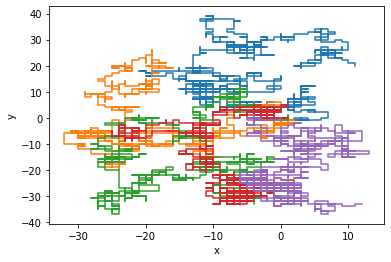

In [194]:
for i in range(5):
    x2 = walk2D(1000, 0, 0)
    plt.plot(x2[0], x2[1])
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('walk2D.jpg');

In [167]:
def walk3D(n, x1_init, x2_init, x3_init):
    x = np.zeros(3*n).reshape(3,n)
    x[0, 0] = x1_init
    x[1, 0] = x2_init
    x[2, 0] = x3_init
    a = np.array([-1,1])
    for i in range(1,n):
        dim_var = np.random.randint(3)
        if dim_var == 0:
            x[0, i] = x[0, i-1] + np.random.choice(a)
            x[1, i] = x[1, i-1]
            x[2, i] = x[2, i-1]
        elif dim_var == 1:
            x[0, i] = x[0, i-1]
            x[1, i] = x[1, i-1] + np.random.choice(a)
            x[2, i] = x[2, i-1]
        else:
            x[0, i] = x[0, i-1]
            x[1, i] = x[1, i-1]
            x[2, i] = x[2, i-1] + np.random.choice(a)
    return x

In [181]:
x3 = walk3D(1000, 0, 0, 0)

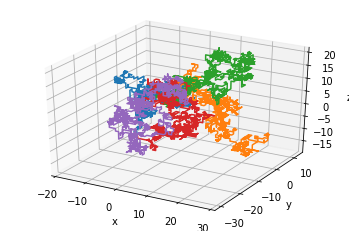

In [189]:
fig = plt.figure()
ax = plt.axes(projection='3d')
for i in range(5):
    x3 = walk3D(1000, 0, 0, 0)
    ax.plot3D(x3[0], x3[1], x3[2])

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.savefig('walk3D.jpg')